# Principal component Analysis
When the number of features used in training a ML model becomes large various problems can arise
  - problem because too complex to interpret. Ideally, you would want only two features in the problem so that you can interpret the problem easily in a 2D diagram
  - if the dataset becomes large, the learning can be computationally inefficient
  - you could get burnt with the curse of dimensionality if the dataset is too small

In order to get rid of the issues due to the presence of large number of features, we do something called dimensionality reduction. The main idea of dimensionality reduction is to reduce the feature space into a smaller subspace without a significant loss of valuable information. There are two ways to do this
   - Feature selection: selecting features through some algorithm (e.g. SBS)
   - Feature extraction: mapping the high dimensional feature space into a lower dimensional feature space using some transformation

In the exercise below, we will try to perform a PCA dimensionality reduction on the very popular "wine dataset" using sklearn. Details about this dataset can be found at https://archive.ics.uci.edu/dataset/109/wine

In [1]:
import pandas as pd
import numpy as np

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                      'wine/wine.data', header=None)

In [2]:
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


- Columns are not named. We will do this in the next code snippet
- Has 178 instances and 13 features (high dimensional data)
- First column is target values

In [5]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                  'Alcalinity of ash', 'Magnesium', 'Total phenols',
                  'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                  'Color intensity', 'Hue', 'OD290/OD315 of diluted wines',
                  'Proline']
# Wines are classified into different class, encoded into numbers, based on the feautures
print("Class labels present:",np.unique(df_wine['Class label']))

Class labels present: [1 2 3]


In [6]:
from sklearn.model_selection import train_test_split

# Unpack the dataset as NumPy array (values will do that )
X, y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y,\
                                                   random_state=0)

# Standardize 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# Do a fit and transform both at the same time using fit_transform
# fit will find the parameters needed for standardization
# transform will transform the data into a standardized form
X_train_std = sc.fit_transform(X_train)
# You need not fit again because it has already been done above
X_test_std = sc.transform(X_test)

In [7]:
# Calculate a covariance matrix 13x13 between features
# Each feature will be a row vector of the X_train_std.T
cov_mat = np.cov(X_train_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print("\nEigenvalues \n%s"%eig_vals)


Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


The range of eigenvalues in large meaning the importance of the features are not all the same. 

Let us plot the variance explained ratios of the eigenvalues to get a better picture.

Explained variance ratio of eigenvalue $\lambda_j = \frac{\lambda_j}{\sum^d_{j=1}\lambda_j}$

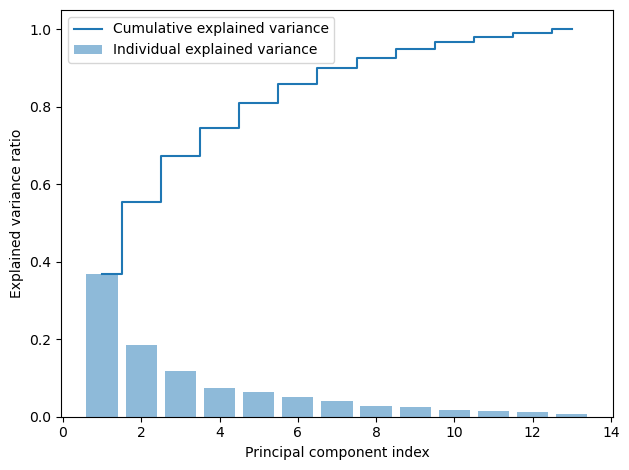

In [8]:
import matplotlib.pyplot as plt

sum_ = sum(eig_vals)
exp_var = [(i/sum_) for i in sorted(eig_vals, reverse=True)]
cum_exp_var = np.cumsum(exp_var)

plt.bar(range(1,14), exp_var, alpha=0.5, align='center',
        label='Individual explained variance')

plt.step(range(1,14), cum_exp_var, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

- First PC accounts for almost 40 % of the total variance
- First two PC explain about 60 % of the variance in the dataset
- The explained variance plot is different from the feature importance values computed using random forest because PCA is unsupervised (information about class lables is ignored). RF uses class membership information to compute node impurity

In [9]:
# Sorting the eigenvectors by decreasing order of the eigenvalues

eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(key=lambda k:k[0], reverse = True)

# Let us choose 2 largest eigenvalues (plotting will be easier)

w = np.hstack((eig_pairs[0][1][:, np.newaxis],
              eig_pairs[1][1][:, np.newaxis]))
print("W:\n", w)

W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [11]:
# Reduce the 13 dim feature data to 2 dim using PCA
X_train_pca = X_train_std.dot(w)


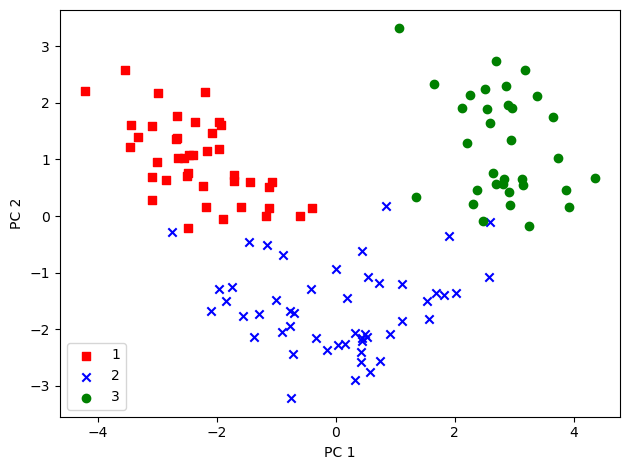

In [12]:
colors = ['r','b','g']
markers = ['s','x','o']

for p,q,r in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==p, 0],X_train_pca[y_train==p, 1],
                c = q, label = p, marker = r)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

__Let us create a plot for the separating hyperplane/ decision boundary__

In [26]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('x','s','o','v','^')
    colors = ('red','blue','green','violet','cyan')
    #Create a colormap out of listed colors
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #Plot decision surface
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                           np.arange(x2_min,x2_max,resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1,xx2,Z,alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # Plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],
                    y=X[y==cl,1],
                   alpha = 0.7, color=cmap(idx),
                   marker=markers[idx],
                   label=cl)
    

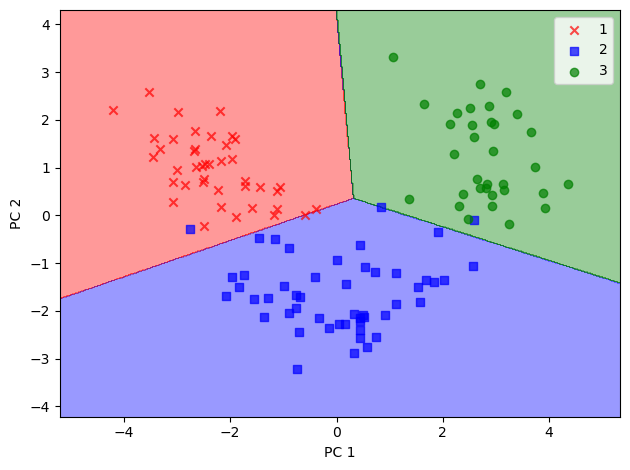

In [30]:
from sklearn.linear_model import LogisticRegression

from sklearn.decomposition import PCA

# Initialize PCA transformer and LogisticRegression estimator
pca = PCA(n_components = 2)
lr = LogisticRegression(random_state=1, solver='lbfgs', multi_class='ovr')

# Reduce the dimension of the feature matrix
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Estimate LogisticRegression fit parameters
lr.fit(X_train_pca, y_train)

plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In order to check how the model performs on the test dataset, we can plot the decision regions of the logistic regression on the tranformed test dataset
    

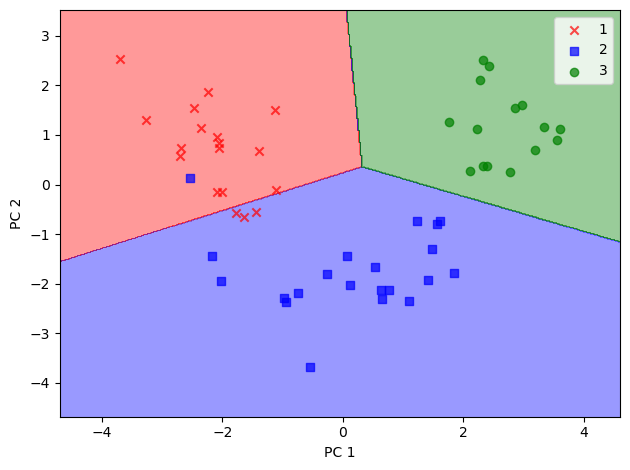

In [31]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend(loc='best')
plt.tight_layout()
plt.show()